In [1]:
%pip install transformers torch scipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from scipy.spatial.distance import cosine

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

def get_embedding(text, tokenizer, model):
    # Tokenize text and convert to input format
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    # Get embeddings from the model
    with torch.no_grad():
        outputs = model(**inputs)
    # Pool the outputs to get a single vector embedding (mean pooling)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings

def calculate_similarity_matrix(text_samples, tokenizer, model):
    # Generate embeddings for each text sample
    embeddings = [get_embedding(text, tokenizer, model).numpy() for text in text_samples]
    
    # Initialize similarity matrix
    n = len(embeddings)
    similarity_matrix = np.zeros((n, n))
    
    # Calculate pairwise cosine similarity
    for i in range(n):
        for j in range(i, n): # No need to calculate twice if i == j or for lower triangle
            if i == j:
                similarity_matrix[i, j] = 1 # Similarity with itself is 1
            else:
                sim = 1 - cosine(embeddings[i], embeddings[j])
                similarity_matrix[i, j] = sim
                similarity_matrix[j, i] = sim # Symmetric property
    
    return similarity_matrix

# Example usage
gpt_text_samples = [
    "Eleanor Arnason (born 1942) is an American science fiction and fantasy author. She has published nine novels, two collections of short fiction, and numerous short stories. Her fiction has been nominated for a Nebula Award and has twice won the James Tiptree Jr. Award. Her novel A Woman of the Iron People won the Mythopoeic Award. \n\nArnason has been writing science fiction and fantasy since the late 1970s. Some of her best-known works include the Hwarhath series, consisting of Ring of Swords (1993), A Kingdom of King and Beasts (1998), and Gone to the Stars (2007). The themes of these stories include gender roles, theology, and politics. Arnason has also written stand-alone novels, such as A Brother's Price (2004), as well as collections of short fiction, such as Son of the Rock (1998).\n\nArnason is known for her explorations of gender roles in a science fiction and fantasy context. Her writing is often praised for its complex and nuanced approach to themes of gender and identity. Arnason's work also often deals with themes of",
    "Eleanor Arnason (born 1942) is an American science fiction and fantasy writer. She is best known for her pivotal contributions to feminist science fiction and her Astrid Johnstone Cycle, spanning five books.\n\nArnason was born and raised in Minnesota. She attended the University of Minnesota, first studying psychology and then creative writing. It was here she published her first short story, 1981's \"The Schennen Touch\", in the Minnesota Quarterly. She later went on to obtain a master\u2019s degree in library science from Rutgers University and a bachelor of arts in English literature from University of California, Berkeley.\n\nArnason was a founding member of Feminists for Animal Rights and is a prominent member of the feminist science fiction community. In 1996, she earned the James Tiptree Jr. Award for her novel, Ring of Swords.\n\nIn 2020, Arnason was the recipient of the Robert A. Heinlein Award for a lifetime of improving the awareness of the human condition through works of science fiction and fantasy.",
    "Eleanor Arnason (born 1942) is an American science fiction and fantasy author. She is the author of several books, including Ring of Swords (1993); Large Number (2015), a collection of short stories; andA Woman of the Iron People (1991), which won the James Tiptree Jr. Award in 1992. She has also won the Philip K. Dick Award twice and has been nominated for the Hugo and Nebula Awards.\n\nHer work often combines science fiction and fantasy elements with feminist themes, exploring gender roles, sexuality and the relationships between people, animals, plants and mountains. Her writing has been compared to that of Ursula K. Le Guin and Joanna Russ, two well-known authors of feminist science fiction. Arnason's stories often emphasize the importance of family and community.",
    "Marshall Manesh (born May 21, 1950) is an Iranian-American actor who has worked in numerous television, movie and theatre productions over the past four decades. He is best known for his recurring role as Ranjit on the hit TV show How I Met Your Mother. He is also known for his roles on the acclaimed HBO series Big Love, the daytime soap opera The Young and the Restless, the critically acclaimed Doc, and in Russell Crowe's directorial debut, The Water Diviner. He has also appeared on NCIS, Desperate Housewives, NCIS: Los Angeles, Grey's Anatomy, 2 Broke Girls and many more. On stage, he has appeared in the world-premiere Broadway production of Ayad Akhtar's play Disgraced, which won the Pulitzer Prize for Drama, and in the Los Angeles premiere of the Pulitzer finalist, Disgraced. In addition to acting, Manesh also co-directs projects for the San Francisco-based company Nesh Entertainment, which develops, builds and produces entertainment geared towards multicultural audiences.",
    "Marshall Manesh (born October 27, 1953) is an American actor known for his comedic and character roles on television. He is best known for playing the role of Rashid Ahmed on the CBS sitcom How I Met Your Mother from 2005 until 2014. \n\nManesh was born in Tehran, Iran to a Persian-Jewish family. After high school, he moved to Israel and served for two years in the Israel Defense Forces. He then moved to the United States, where he attended and graduated from UCLA, earning a bachelor\u2019s degree in international relations. Manesh is a devoutly religious Jew, and performed his first role as a rabbi in the movie The Hebrew Hammer. \n\nManesh's first notable television role was as Doogie Howser's neighbor, Osman, on Doogie Howser, M.D.. He has also appeared in various movies, including The Princess Diaries 2: Royal Engagement, Legally Blonde 2: Red, White & Blonde and Get Smart. He recently appeared in two episodes of the hit show Modern Family.",
    "Marshall Manesh (born February 15, 1961) is an American actor, best known for his roles as Ranjit on the television show How I Met Your Mother, Dr. Mehraban on The Mindy Project, Ramon Raines on Malibu Country, and Mr. Rostenkowski on The Middle. He is of Iranian descent and speaks Persian fluently. He also speaks English and French.\n\nManesh began acting in theater and television commercials at the age of nine. One of his first acting roles was in the 1975 TV movie The Hardy Boys/Nancy Drew Mysteries. He later worked on stage plays and sitcoms in the late 1970s and early 1980s including Benson, Archie Bunker's Place, Three's Company and Hello Larry. Manesh most recently appeared in the 2019 Netflix original series The Kominsky Method.",
]

similarity_matrix = calculate_similarity_matrix(gpt_text_samples, tokenizer, model)

# To calculate the average similarity excluding self-comparisons
# We mask the diagonal and then calculate the average
mask = np.ones(similarity_matrix.shape, dtype=bool)
np.fill_diagonal(mask, 0)
average_similarity = np.mean(similarity_matrix[mask])
print(f"Average similarity (excluding self-comparisons): {average_similarity}")

Average similarity (excluding self-comparisons): 0.34991080512603123


In [5]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


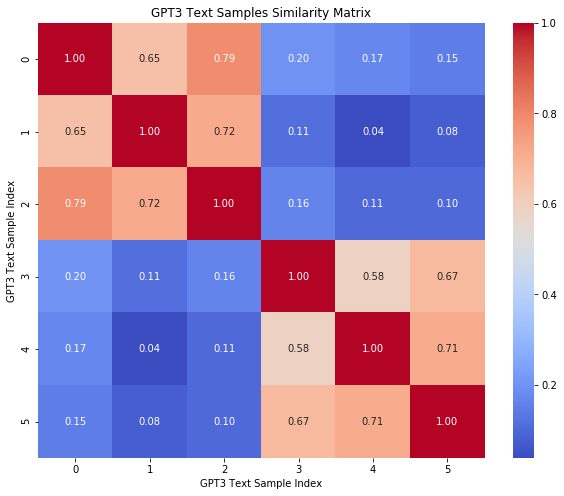

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your similarity_matrix from the previous step

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('GPT3 Text Samples Similarity Matrix')
plt.xlabel('GPT3 Text Sample Index')
plt.ylabel('GPT3 Text Sample Index')
plt.show()